# IHS Plots
Plots for the IHS experiments

1. Experiment 0 - error comparison for growing data size
2. Experiment 1 - Error for iterations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

### Experiment 0

In [2]:
df = pd.read_csv('experiment0-ihs-ols.csv')

In [3]:
df.head(10)

,Rows,Optimal,Classical CountSketch,Classical SRHT,Classical SJLT,Classical Gaussian,IHS CountSketch,IHS SRHT,IHS SJLT,IHS Gaussian
0,100,0.159489,0.465667,0.144351,0.211749,0.413222,0.853377,0.159481,11.287616,0.159477
1,200,0.288254,0.367942,0.351978,0.296616,0.321883,0.819787,0.288305,0.438181,0.288377
2,400,0.102558,0.221441,0.088834,0.232020,0.189334,1.320699,0.102549,7.985673,0.102288
3,800,0.111391,0.157752,0.131646,0.121841,0.176521,0.737680,0.111582,0.109798,0.111387
4,1600,0.074319,0.139247,0.114404,0.128572,0.145105,1.534970,0.074265,0.602393,0.074321
5,3200,0.051317,0.126033,0.078362,0.148156,0.100874,0.921302,0.051328,0.454800,0.051287


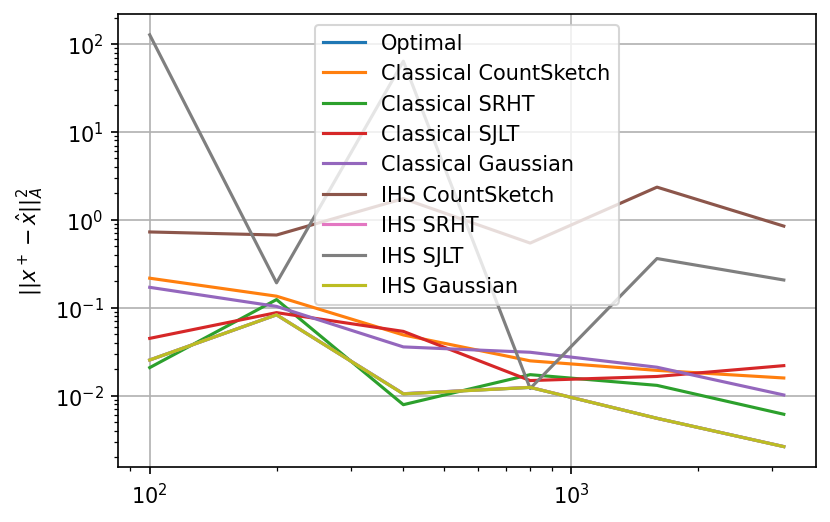

In [4]:
fig,ax = plt.subplots(dpi=150)
x = df['Rows']
for col in df.columns:
    if col != "Rows":
        ax.plot(x,df[col]**2,label=col)
ax.legend()
ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)
ax.set_ylabel(r'$|| x^+ - \hat{x} ||_A^2$')
#ax.set_ylim(1E-3,1)
ax.grid()

In [5]:
df

,Rows,Optimal,Classical CountSketch,Classical SRHT,Classical SJLT,Classical Gaussian,IHS CountSketch,IHS SRHT,IHS SJLT,IHS Gaussian
0,100,0.159489,0.465667,0.144351,0.211749,0.413222,0.853377,0.159481,11.287616,0.159477
1,200,0.288254,0.367942,0.351978,0.296616,0.321883,0.819787,0.288305,0.438181,0.288377
2,400,0.102558,0.221441,0.088834,0.232020,0.189334,1.320699,0.102549,7.985673,0.102288
3,800,0.111391,0.157752,0.131646,0.121841,0.176521,0.737680,0.111582,0.109798,0.111387
4,1600,0.074319,0.139247,0.114404,0.128572,0.145105,1.534970,0.074265,0.602393,0.074321
5,3200,0.051317,0.126033,0.078362,0.148156,0.100874,0.921302,0.051328,0.454800,0.051287


## Experiment 1

In [6]:
df_opt = pd.read_csv('experiment1-ihs-iterations-opt.csv')
df_model = pd.read_csv('experiment1-ihs-iterations-model.csv')

In [7]:
df_opt.head()

,CountSketch5,CountSketch10,SRHT5,SRHT10,SJLT5,SJLT10,Gaussian5,Gaussian10
0,0.722733,0.367433,0.735273,0.337999,0.587729,0.411506,0.705476,0.345380
1,0.444498,0.165440,0.442009,0.102473,0.400593,0.192777,0.486874,0.118516
2,0.287685,0.069393,0.328139,0.036124,0.279556,0.077253,0.332859,0.045888
3,0.192451,0.028423,0.218344,0.013192,0.182450,0.031133,0.253116,0.017097
4,0.125232,0.010803,0.132444,0.004290,0.138906,0.011086,0.185774,0.005969


In [8]:
np.log(np.sqrt(df_model)).head()

,CountSketch5,CountSketch10,SRHT5,SRHT10,SJLT5,SJLT10,Gaussian5,Gaussian10
0,-0.135649,-0.455324,-0.132473,-0.481210,-0.237935,-0.384520,-0.144242,-0.465887
1,-0.365726,-0.705661,-0.372778,-0.757376,-0.432664,-0.683804,-0.334082,-0.793002
2,-0.563760,-0.830007,-0.501100,-0.857414,-0.550122,-0.829382,-0.532433,-0.859595
3,-0.668254,-0.864497,-0.652712,-0.865163,-0.707095,-0.850810,-0.546684,-0.862812
4,-0.772849,-0.865769,-0.762734,-0.864963,-0.730591,-0.861542,-0.715576,-0.863831


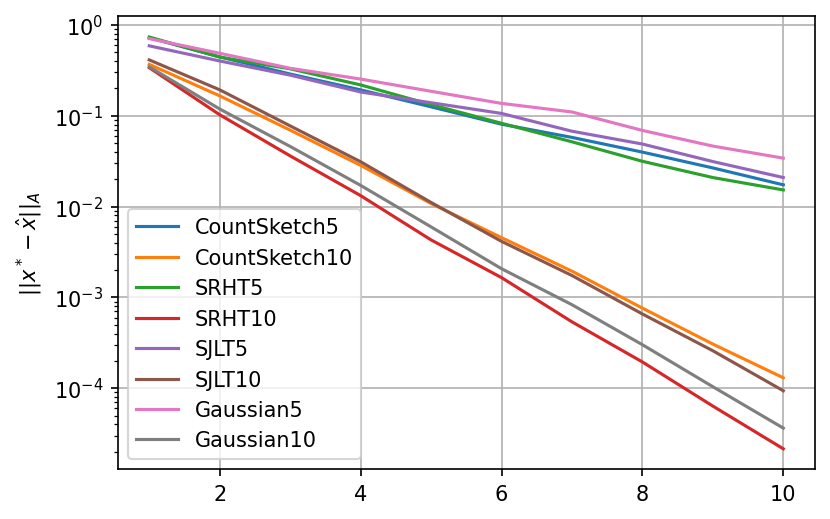

In [10]:
fig,ax = plt.subplots(dpi=150)
x = df_opt.index
for col in df_opt.columns:
    if col != "Rows":
        ax.plot(1+x,df_opt[col],label=col)
ax.legend()
ax.set_yscale('log',base=10)
#ax.set_xscale('log',base=10)
ax.set_ylabel(r'$|| x^* - \hat{x} ||_A$')
#ax.set_ylim(1E-3,1)
ax.grid()

Note that the axis in the IHS paper is slightly off but it is equivalent.  
If we subtract $1$ from all of the $y$ values to plot then we recover the plot from the ihs paper.
I can't justify why this is the case though so do not do so.

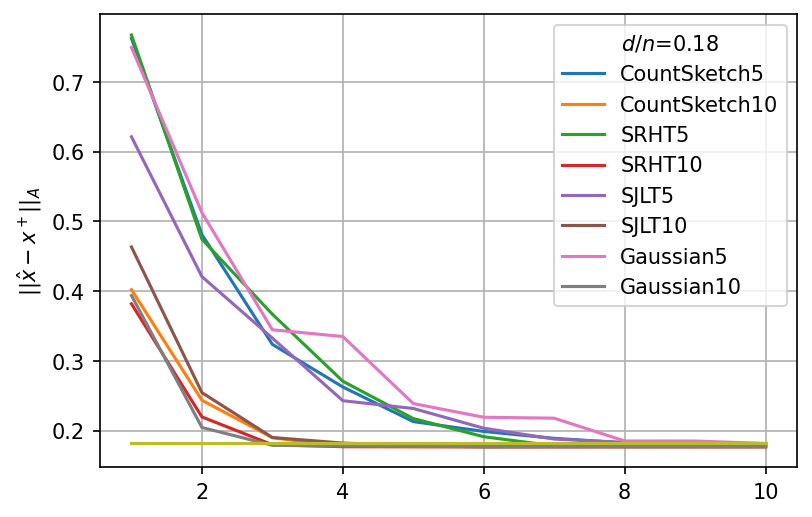

In [13]:
d_over_n = np.sqrt(200 / 6000)
fig,ax = plt.subplots(dpi=150)
x = df_model.index
for col in df_model.columns:
    if col != "Rows":
        ax.plot(1+x,(df_model[col]),label=col)
        #ax.plot(1+x,np.log(df_model[col]),label=col)
ax.plot(1+x,(d_over_n*np.ones_like(1+x)))
#ax.plot(1+x,np.log(d_over_n*np.ones_like(1+x)))
ax.legend(title=fr'$d/n$={d_over_n:.2f}')
#ax.set_yscale('log',base=10)
#ax.set_xscale('log',base=10)
ax.set_ylabel(r'$|| \hat{x} - x^+ ||_A$')
#ax.set_ylim(0.15,0.5)
#ax.set_ylim(1E-3,1)
ax.grid()

In [49]:
df = pd.DataFrame(np.zeros((10,6)))
df.columns = pd.MultiIndex.from_product([['SVD', 'SJLT','CountSketch'],['Sketch Time','SVD Time']])
df

SVD                 SJLT          CountSketch         
  Sketch Time SVD Time Sketch Time SVD Time Sketch Time SVD Time
0         0.0      0.0         0.0      0.0         0.0      0.0
1         0.0      0.0         0.0      0.0         0.0      0.0
2         0.0      0.0         0.0      0.0         0.0      0.0
3         0.0      0.0         0.0      0.0         0.0      0.0
4         0.0      0.0         0.0      0.0         0.0      0.0
5         0.0      0.0         0.0      0.0         0.0      0.0
6         0.0      0.0         0.0      0.0         0.0      0.0
7         0.0      0.0         0.0      0.0         0.0      0.0
8         0.0      0.0         0.0      0.0         0.0      0.0
9         0.0      0.0         0.0      0.0         0.0      0.0

In [59]:
df['SVD','SVD Time'] = 1.

In [60]:
df

SVD                 SJLT          CountSketch         
  Sketch Time SVD Time Sketch Time SVD Time Sketch Time SVD Time
0         0.0      1.0         0.0      0.0         0.0      0.0
1         0.0      1.0         0.0      0.0         0.0      0.0
2         0.0      1.0         0.0      0.0         0.0      0.0
3         0.0      1.0         0.0      0.0         0.0      0.0
4         0.0      1.0         0.0      0.0         0.0      0.0
5         0.0      1.0         0.0      0.0         0.0      0.0
6         0.0      1.0         0.0      0.0         0.0      0.0
7         0.0      1.0         0.0      0.0         0.0      0.0
8         0.0      1.0         0.0      0.0         0.0      0.0
9         0.0      1.0         0.0      0.0         0.0      0.0

In [43]:
set(df.columns.get_level_values(0))

{'CountSketch', 'SJLT'}

In [46]:
for c in set(df.columns.get_level_values(0)):
    df[c,'Total Time'] = df[c]['Sketch Time'] + df[c]['SVD Time']
df = df.sort_index(axis=1)

In [47]:
df

CountSketch                             SJLT                       
     SVD Time Sketch Time Total Time  SVD Time Sketch Time Total Time
0    0.304860    0.578201   0.883061  0.197776    0.287509   0.485285
1    0.529399    0.102866   0.632265  0.954630    0.978153   1.932782
2    0.698215    0.733381   1.431596  0.558698    0.333055   0.891753
3    0.042454    0.333917   0.376371  0.588034    0.982033   1.570067

In [30]:
df['SJLT']['Sketch Time']

0    0.287509
1    0.978153
2    0.333055
3    0.982033
Name: Sketch Time, dtype: float64

In [37]:
df = df.sort_index(axis=1)

## EXPERIMENT 2 - ERROR VS TIME


In [126]:
df = pd.read_csv('experiment2-ihs-iterations-time.csv',header=[0,1]) # [0,1] for multiindex header

In [127]:
df.head()

Exact(SVD)                                              CountSketch  \
      Sketch       SVD Solve Coefficient Error Test Error      Sketch   
0        0.0  0.068341   0.0               0.0   1.040243    0.007073   
1        0.0  0.068341   0.0               0.0   1.040243    0.007087   
2        0.0  0.068341   0.0               0.0   1.040243    0.006993   
3        0.0  0.068341   0.0               0.0   1.040243    0.007029   
4        0.0  0.068341   0.0               0.0   1.040243    0.006972   

                                                    ...      SJLT            \
        SVD     Solve Coefficient Error Test Error  ...    Sketch       SVD   
0  0.020552  0.000726          0.720660   1.553405  ...  0.033738  0.022064   
1  0.020407  0.000673          0.483268   1.275434  ...  0.033351  0.020621   
2  0.020240  0.000669          0.326460   1.177183  ...  0.032651  0.020404   
3  0.020318  0.000673          0.220055   1.089732  ...  0.033325  0.020698   
4  0.020317  0.000659          0.154996   1.066297  ...  0.033305  0.020416   

                                          Gaussian                      \
      Solve Coefficient Error Test Error    Sketch       SVD     Solve   
0  0.000738          0.707101   1.598569  0.181398  0.037287  0.000838   
1  0.000751          0.470432   1.274379  0.181527  0.022574  0.000833   
2  0.000757          0.341882   1.172183  0.180860  0.021275  0.000834   
3  0.000774          0.242073   1.111751  0.186564  0.032806  0.000827   
4  0.000738          0.159813   1.065736  0.181101  0.021628  0.000840   

                                
  Coefficient Error Test Error  
0          0.678376   1.542345  
1          0.448559   1.226152  
2          0.312046   1.144365  
3          0.206042   1.076361  
4          0.132244   1.065666  

[5 rows x 25 columns]

In [128]:
for c in set(df.columns.get_level_values(0)):
    print(c)

SJLT
SRHT
CountSketch
Gaussian
Exact(SVD)


Let's plot the error against time

Text(0.5, 0, 'Iterations')

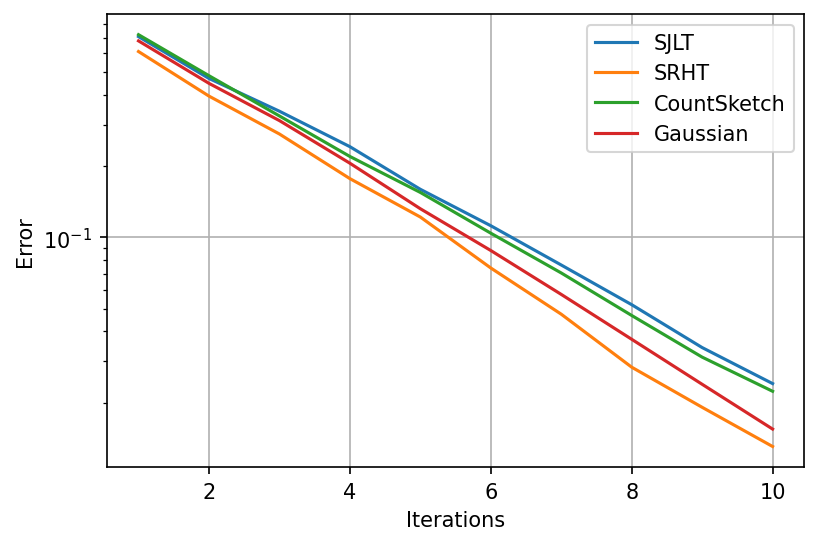

In [129]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        ax.plot(iterations, df[c,'Coefficient Error'],label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Error')
ax.set_xlabel('Iterations')

Text(0.5, 0, 'Time (Seconds)')

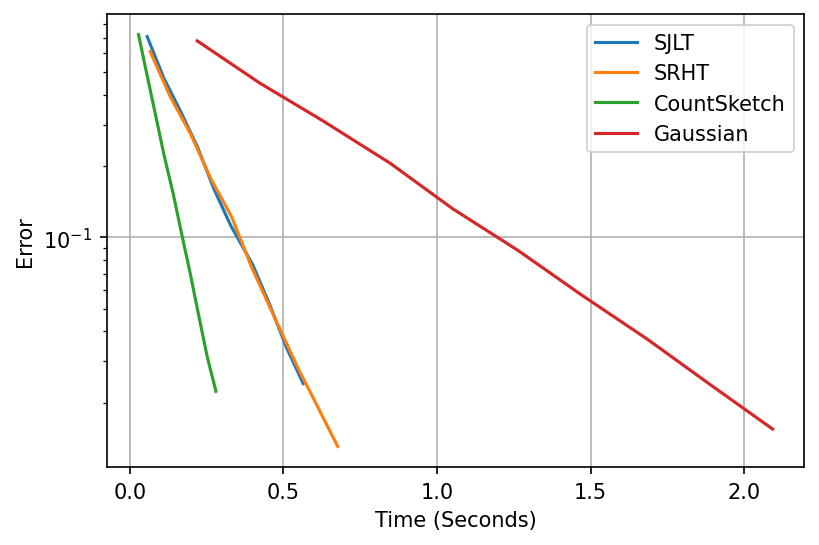

In [130]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    total_time = 0.
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        ax.plot(iter_time.cumsum(),df[c,'Coefficient Error'],label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
#ax.set_xscale('log',base=2)
ax.set_ylabel('Error')
ax.set_xlabel('Time (Seconds)')

Text(0, 0.5, 'Time (Seconds)')

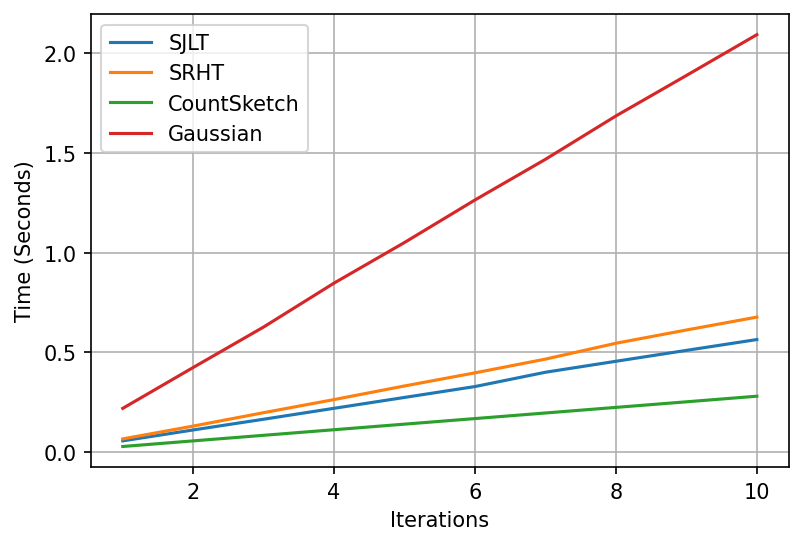

In [136]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
for c in set(df.columns.get_level_values(0)):
    total_time = 0.
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        ax.plot(iterations,iter_time.cumsum(),label=c)
ax.legend()
ax.grid()
#ax.set_yscale('log')
#ax.set_xscale('log',base=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Time (Seconds)')

1.0402425913427442


Text(0.5, 0, 'Iterations')

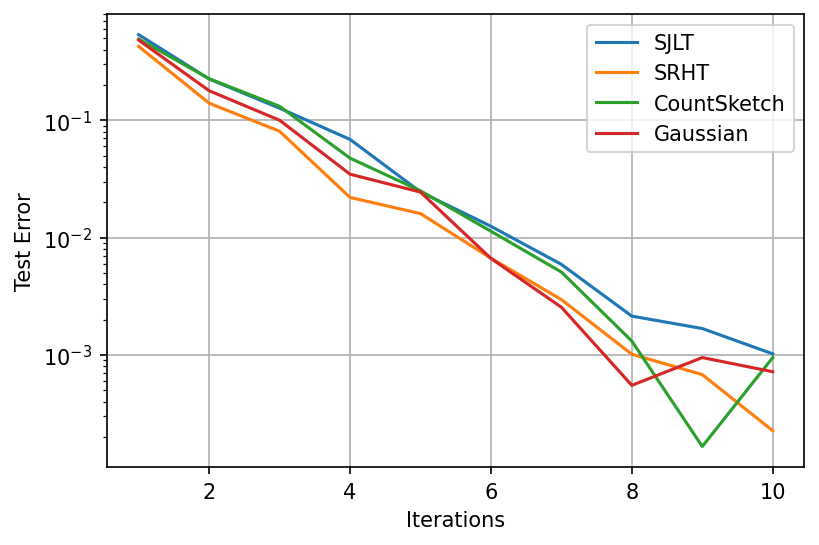

In [135]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
opt_test_error = df['Exact(SVD)']['Test Error'][0]
print(opt_test_error)
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        test_err_ratio = np.abs(df[c,'Test Error']/opt_test_error - 1)
        ax.plot(iterations, test_err_ratio,label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Test Error')
ax.set_xlabel('Iterations')

1.0402425913427442


Text(0.5, 0, 'Time')

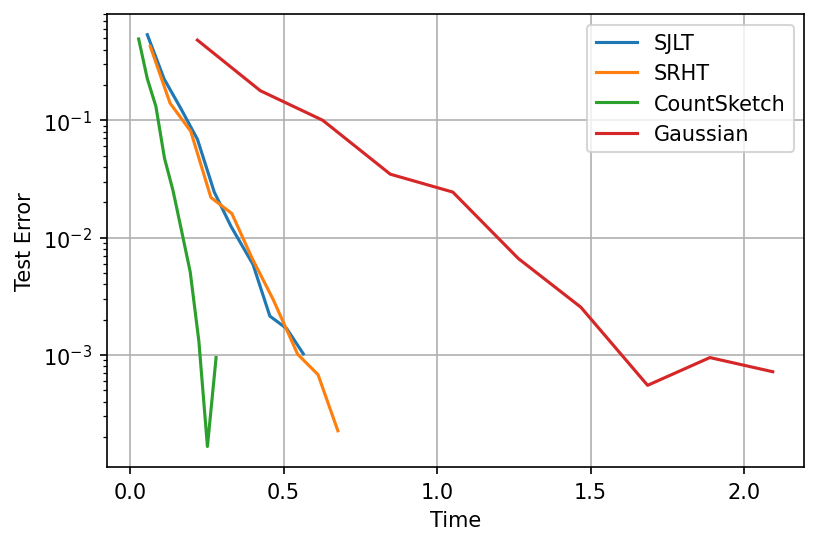

In [133]:
fig, ax = plt.subplots(dpi=150)
iterations = 1 + df.index
opt_test_error = df['Exact(SVD)']['Test Error'][0]
print(opt_test_error)
for c in set(df.columns.get_level_values(0)):
    if c != 'Exact(SVD)':
        iter_time = df[c]['Sketch'] + df[c]['SVD'] + df[c]['Solve']
        test_err_ratio = np.abs(df[c,'Test Error']/opt_test_error - 1)
        ax.plot(iter_time.cumsum(), test_err_ratio,label=c)
ax.legend()
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Test Error')
ax.set_xlabel('Time')